In [1]:
from qiskit import *

In [2]:
%config InlineBackend.figure_formate = "svg" #Makes images look nice

In [3]:
qc = QuantumCircuit()

In [4]:
qr = QuantumRegister(2, 'qreg')

In [5]:
qc.add_register(qr)
qc.qregs

[QuantumRegister(2, 'qreg')]

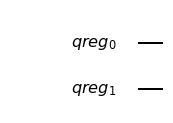

In [6]:
qc.draw(output='mpl')

In [7]:
qc.h(qr[0])

In [8]:
qc.cx(qr[0],qr[1]);

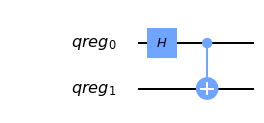

In [9]:
qc.draw(output='mpl')

In [10]:
vector_sim = Aer.get_backend("statevector_simulator")

In [11]:
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>,
 <PulseSimulator('pulse_simulator') from AerProvider()>]

In [12]:
job = execute(qc, vector_sim)

In [14]:
ket = job.result().get_statevector()
for amplitude in ket:
    print(amplitude)

(0.7071067811865476+0j)
0j
0j
(0.7071067811865475+0j)


In [15]:
new_qc = QuantumCircuit( qr )
new_qc.initialize(ket, qr)

In [16]:
cr = ClassicalRegister(2, 'creg')
qc.add_register(cr)

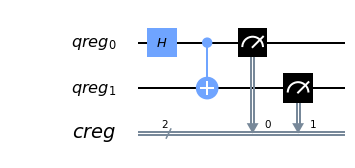

In [17]:
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.draw(output='mpl')

In [18]:
emulator = Aer.get_backend("qasm_simulator")
job=execute(qc, emulator, shots=8192)

In [20]:
hist = job.result().get_counts()

In [21]:
print(hist)

{'11': 4161, '00': 4031}


In [22]:
from qiskit.visualization import plot_histogram

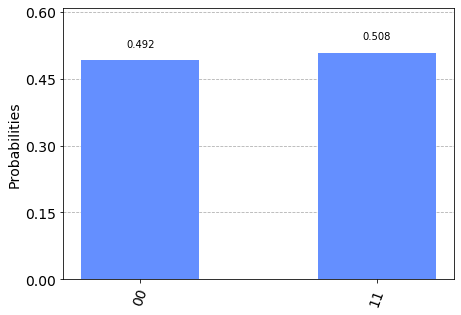

In [23]:
plot_histogram(hist)

In [25]:
job = execute( qc, emulator, shots=10, memory=True)
samples = job.result().get_memory()
print(samples)

['00', '11', '11', '00', '00', '00', '11', '00', '11', '00']


In [26]:
qubit = QuantumRegister(8)
bit = ClassicalRegister(8)
circuit = QuantumCircuit(qubit, bit)
circuit.x(qubit[7])
circuit.measure(qubit, bit)
execute(circuit, emulator, shots=8192).result().get_counts()

{'10000000': 8192}

In [27]:
qc = QuantumCircuit(3)

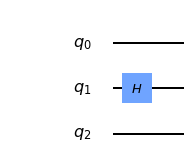

In [28]:
qc.h(1)
qc.draw(output='mpl')

In [29]:
qc = QuantumCircuit(2, 1)

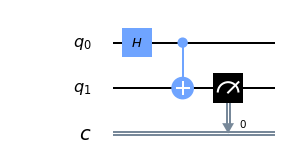

In [30]:
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)

qc.draw(output='mpl')

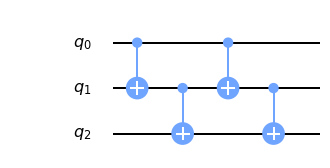

In [31]:
sub_circuit = QuantumCircuit(3, name='toggle_cx')
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.draw(output='mpl')

In [32]:
toggle_cx = sub_circuit.to_instruction()

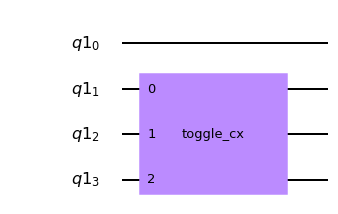

In [33]:
qr = QuantumRegister(4)
new_qc = QuantumCircuit(qr)

new_qc.append(toggle_cx, [qr[1],qr[2],qr[3]])
new_qc.draw(output='mpl')

In [35]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [37]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [39]:
for backend in provider.backends():
    print(backend.status())

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.1.547', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='2.0.5', operational=True, pending_jobs=25, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='2.0.6', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=123, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=85, status_msg='active')
BackendStatus(backend_name='ibmq_london', backend_version='1.1.0', operational=True, pending_jobs=14, status_msg='active')
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=8, status_msg='active')
BackendStatus(backend_name='ibmq_essex', backend_version='1.0.1', operational=True, pending_jobs=1, status_msg='active')
Backen

In [40]:
real_device = provider.get_backend("ibmq_16_melbourne")

In [41]:
properties= real_device.properties()
coupling_map = real_device.configuration().coupling_map

In [42]:
from qiskit.providers.aer.noise import NoiseModel
noise_model = NoiseModel.from_backend(properties)

In [43]:
qc = QuantumCircuit(2,2)
qc.x(1)
qc.measure(0,0)
qc.measure(1,1)

job = execute(qc, emulator, shots=1024, noise_model=noise_model, coupling_map = coupling_map,
             basis_gates=noise_model.basis_gates)
job.result().get_counts()

{'10': 972, '01': 1, '11': 3, '00': 48}

In [44]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.1',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.5.0',
 'qiskit-aqua': '0.6.5',
 'qiskit': '0.16.2'}